In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas.plotting import table

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
for className in Base.classes.keys():
    print(f'Class Name: {className}')

Class Name: measurement
Class Name: station


In [7]:
# Save references to each table
measurementTable = Base.classes.measurement
stationTable = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
datas = session.query(stationTable.station).all()
for data in datas:
    print(data[0])

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recentDate = session.query(func.max(measurementTable.date)).first()
print(recentDate)

('2017-08-23',)


2016-08-23


,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


Text(0, 0.5, 'inch')

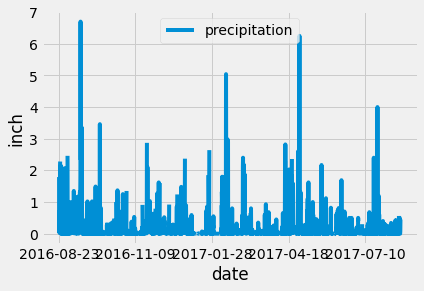

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
timeDiff = dt.date(2017,8,23) - dt.timedelta(days = 365)
timeDiff

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurementTable.date, measurementTable.prcp).filter(measurementTable.date >= timeDiff).all()
data
print(data[0].date)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data, columns = ['date', 'precipitation'])

# Sort the dataframe by date
df.sort_values("date", inplace=True)
display(df)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x = 'date', y = 'precipitation')
plt.xlabel('date')
plt.ylabel("inch")



In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
totalNumberStations = session.query(func.count(stationTable.station)).all()[0][0]
totalNumberStations

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activeStation = session.query(measurementTable.station, func.count(measurementTable.station)).group_by(measurementTable.station).order_by(func.count(measurementTable.station).desc()).all()
activeStation

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostActiveStationId = session.query(func.min(measurementTable.tobs), func.max(measurementTable.tobs), func.avg(measurementTable.tobs)).filter(measurementTable.station == 'USC00519281').all()
mostActiveStationId


[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

lastYearTempObservation = session.query(measurementTable.tobs).filter(measurementTable.date >= timeDiff).filter(measurementTable.station == 'USC00519281').all()
lastYearTempObservation


[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [ ]:
df = pd.DataFrame(lastYearTempObservation, columns=['Temperature Observation'])

# Close session

In [ ]:
# Close Session
session.close()